In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("house_price.csv")

In [3]:
df

,Size,Bedrooms,Price
0,1500,3,400000
1,1600,3,425000
2,1700,2,450000
3,1650,2,420000
4,1580,3,400000
5,1800,3,500000
6,1930,3,530000
7,1590,2,380000
8,1750,2,400000


In [4]:
list(df.columns)

['Size', 'Bedrooms', 'Price']

In [5]:
df.loc[0:3]

,Size,Bedrooms,Price
0,1500,3,400000
1,1600,3,425000
2,1700,2,450000
3,1650,2,420000


In [6]:
df[df['Bedrooms'] > 2]

,Size,Bedrooms,Price
0,1500,3,400000
1,1600,3,425000
4,1580,3,400000
5,1800,3,500000
6,1930,3,530000


In [7]:
df.groupby("Bedrooms").max()

,Size,Price
Bedrooms,,
2,1750,450000
3,1930,530000


In [8]:
list(df['Bedrooms'].unique())

[3, 2]

In [9]:
df['Price'].sort_values()

7    380000
0    400000
4    400000
8    400000
3    420000
1    425000
2    450000
5    500000
6    530000
Name: Price, dtype: int64

In [10]:
df.query('Price > 450000')[['Size','Bedrooms']]

,Size,Bedrooms
5,1800,3
6,1930,3


In [11]:
df.query('Size > 1600 and Bedrooms==2')

,Size,Bedrooms,Price
2,1700,2,450000
3,1650,2,420000
8,1750,2,400000


In [12]:
sizes=[1800,1760,1650,1850,1580,1550,1790]
bedrooms=np.random.randint(1,4,7)
prices=np.random.randint(400000,600000,7)

In [13]:
df1=pd.DataFrame({"Size": sizes,"Bedrooms":bedrooms,"Price":prices})

In [14]:
df1

,Size,Bedrooms,Price
0,1800,3,432870
1,1760,2,463065
2,1650,1,510540
3,1850,2,592647
4,1580,3,525234
5,1550,2,406745
6,1790,2,526191


In [15]:
houseDf=pd.concat([df,df1],ignore_index=True)

In [16]:
houseDf['Bedrooms'].sort_values()

11    1
2     2
3     2
7     2
8     2
10    2
12    2
14    2
15    2
0     3
1     3
4     3
5     3
6     3
9     3
13    3
Name: Bedrooms, dtype: int64

In [17]:
houseDf[1:14:3]

,Size,Bedrooms,Price
1,1600,3,425000
4,1580,3,400000
7,1590,2,380000
10,1760,2,463065
13,1580,3,525234


In [18]:
houseDf.loc[7]['Bedrooms']

2

In [19]:
houseDf.sort_values('Price')

,Size,Bedrooms,Price
7,1590,2,380000
0,1500,3,400000
4,1580,3,400000
8,1750,2,400000
14,1550,2,406745
3,1650,2,420000
1,1600,3,425000
9,1800,3,432870
2,1700,2,450000
10,1760,2,463065


In [20]:
bdf2=houseDf[houseDf['Bedrooms']==2]

In [21]:
houseDf.groupby('Bedrooms').count()

,Size,Price
Bedrooms,,
1,1,1
2,8,8
3,7,7


In [22]:
houseDf["Swimming Pool"]="Yes"

In [23]:
houseDf.loc[0,'Swimming Pool']="No"

In [24]:
houseDf

,Size,Bedrooms,Price,Swimming Pool
0,1500,3,400000,No
1,1600,3,425000,Yes
2,1700,2,450000,Yes
3,1650,2,420000,Yes
4,1580,3,400000,Yes
5,1800,3,500000,Yes
6,1930,3,530000,Yes
7,1590,2,380000,Yes
8,1750,2,400000,Yes
9,1800,3,432870,Yes


In [25]:
houseDf['Swimming Pool'] = np.where(houseDf.index.isin([1,3,4,7,9,10,14,15]), 'Yes', 'No')


In [26]:
conditions=[
    houseDf.index.isin([0,3,4,5,9,12]),
    houseDf.index.isin([1,2,6,8,15]),
    houseDf.index.isin([7,10,11,13,14])
]

In [27]:
choices = ['Furnished', 'Unfurnished', 'Semi-Furnished']

In [28]:
houseDf['Status']=np.select(conditions,choices)

In [29]:
houseDf.groupby('Status').count()

,Size,Bedrooms,Price,Swimming Pool
Status,,,,
Furnished,6,6,6,6
Semi-Furnished,5,5,5,5
Unfurnished,5,5,5,5


In [30]:
houseDf[(houseDf['Status']=="Furnished")&(houseDf['Swimming Pool']=="Yes")]

,Size,Bedrooms,Price,Swimming Pool,Status
3,1650,2,420000,Yes,Furnished
4,1580,3,400000,Yes,Furnished
9,1800,3,432870,Yes,Furnished


In [31]:
houseDf.query('`Swimming Pool` =="Yes" and Status=="Unfurnished"')[['Size','Bedrooms']]

,Size,Bedrooms
1,1600,3
15,1790,2


In [32]:
houseDf.columns

Index(['Size', 'Bedrooms', 'Price', 'Swimming Pool', 'Status'], dtype='object')

In [33]:
houseDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Size           16 non-null     int64 
 1   Bedrooms       16 non-null     int64 
 2   Price          16 non-null     int64 
 3   Swimming Pool  16 non-null     object
 4   Status         16 non-null     object
dtypes: int64(3), object(2)
memory usage: 772.0+ bytes


In [34]:
houseDf['Swimming Pool'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
houseDf["Age"]=np.select([houseDf.index%3==0,houseDf.index%3==1,houseDf.index%3==2],[1,2,3])

In [36]:
cols=list(houseDf.columns)

In [37]:
cols.pop(2)

'Price'

In [38]:
cols.append("Price")

In [39]:
cols

['Size', 'Bedrooms', 'Swimming Pool', 'Status', 'Age', 'Price']

In [40]:
houseDf=houseDf[cols]

In [41]:
houseDf

,Size,Bedrooms,Swimming Pool,Status,Age,Price
0,1500,3,No,Furnished,1,400000
1,1600,3,Yes,Unfurnished,2,425000
2,1700,2,No,Unfurnished,3,450000
3,1650,2,Yes,Furnished,1,420000
4,1580,3,Yes,Furnished,2,400000
5,1800,3,No,Furnished,3,500000
6,1930,3,No,Unfurnished,1,530000
7,1590,2,Yes,Semi-Furnished,2,380000
8,1750,2,No,Unfurnished,3,400000
9,1800,3,Yes,Furnished,1,432870


In [42]:
houseDf.sort_values('Age')

,Size,Bedrooms,Swimming Pool,Status,Age,Price
0,1500,3,No,Furnished,1,400000
3,1650,2,Yes,Furnished,1,420000
6,1930,3,No,Unfurnished,1,530000
9,1800,3,Yes,Furnished,1,432870
12,1850,2,No,Furnished,1,592647
15,1790,2,Yes,Unfurnished,1,526191
1,1600,3,Yes,Unfurnished,2,425000
4,1580,3,Yes,Furnished,2,400000
7,1590,2,Yes,Semi-Furnished,2,380000
10,1760,2,Yes,Semi-Furnished,2,463065


In [43]:
for s,c in dict(houseDf['Status'].value_counts()).items():
    print("Number of {status} houses : {count}".format(status=s,count=c))

Number of Furnished houses : 6
Number of Unfurnished houses : 5
Number of Semi-Furnished houses : 5


In [44]:
status_counts=houseDf['Status'].value_counts()

In [45]:
status_counts.values

array([6, 5, 5], dtype=int64)

In [46]:
import matplotlib.pyplot as plt

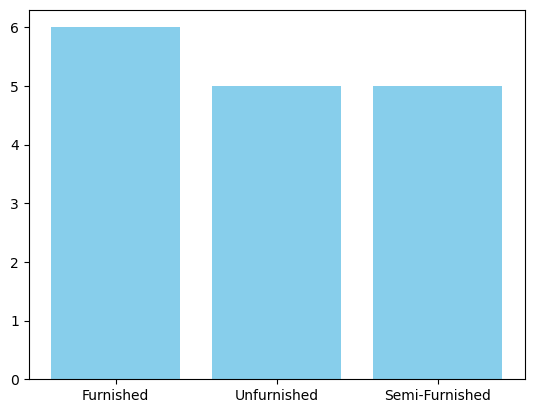

In [47]:
plt.bar(status_counts.index, status_counts.values, color='skyblue')
plt.show()

In [48]:
pool_counts=houseDf['Swimming Pool'].value_counts()

In [49]:
pool_counts

Swimming Pool
No     8
Yes    8
Name: count, dtype: int64

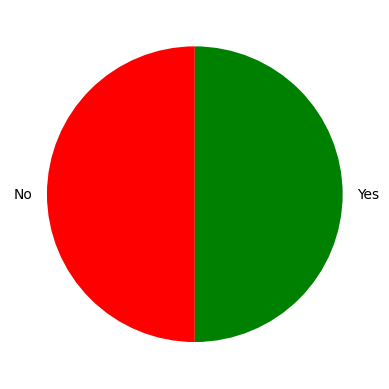

In [50]:
plt.pie(pool_counts.values,labels=pool_counts.index,startangle=90, colors=['red', 'green'])
plt.show()

In [51]:
houseDf.query('Bedrooms != Age and Status in ("Furnished","Unfurnished")')

,Size,Bedrooms,Swimming Pool,Status,Age,Price
0,1500,3,No,Furnished,1,400000
1,1600,3,Yes,Unfurnished,2,425000
2,1700,2,No,Unfurnished,3,450000
3,1650,2,Yes,Furnished,1,420000
4,1580,3,Yes,Furnished,2,400000
6,1930,3,No,Unfurnished,1,530000
8,1750,2,No,Unfurnished,3,400000
9,1800,3,Yes,Furnished,1,432870
12,1850,2,No,Furnished,1,592647
15,1790,2,Yes,Unfurnished,1,526191


In [52]:
dict(houseDf[['Swimming Pool', 'Status']].value_counts())

{('No', 'Furnished'): 3,
 ('No', 'Unfurnished'): 3,
 ('Yes', 'Furnished'): 3,
 ('Yes', 'Semi-Furnished'): 3,
 ('No', 'Semi-Furnished'): 2,
 ('Yes', 'Unfurnished'): 2}

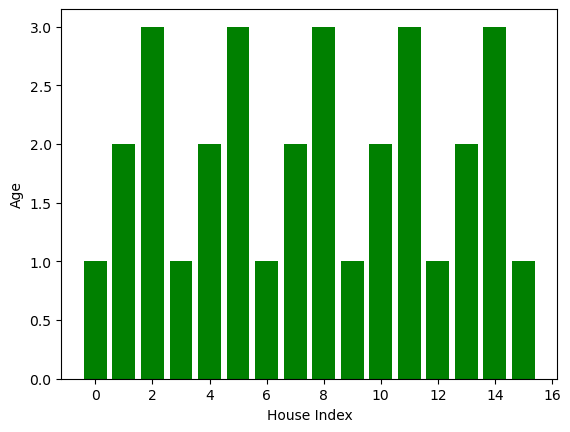

In [53]:
plt.bar(houseDf.index,houseDf['Age'],color="g")
plt.xlabel("House Index")
plt.ylabel('Age')
plt.show()

In [54]:
houseDf.sort_values('Price')

,Size,Bedrooms,Swimming Pool,Status,Age,Price
7,1590,2,Yes,Semi-Furnished,2,380000
0,1500,3,No,Furnished,1,400000
4,1580,3,Yes,Furnished,2,400000
8,1750,2,No,Unfurnished,3,400000
14,1550,2,Yes,Semi-Furnished,3,406745
3,1650,2,Yes,Furnished,1,420000
1,1600,3,Yes,Unfurnished,2,425000
9,1800,3,Yes,Furnished,1,432870
2,1700,2,No,Unfurnished,3,450000
10,1760,2,Yes,Semi-Furnished,2,463065


In [55]:
dict(houseDf['Age'].value_counts())

{1: 6, 2: 5, 3: 5}

In [56]:
houseDf['Age']=np.random.randint(1,4,16)

In [57]:
houseDf.sort_values(['Price','Age'])

,Size,Bedrooms,Swimming Pool,Status,Age,Price
7,1590,2,Yes,Semi-Furnished,3,380000
0,1500,3,No,Furnished,3,400000
4,1580,3,Yes,Furnished,3,400000
8,1750,2,No,Unfurnished,3,400000
14,1550,2,Yes,Semi-Furnished,3,406745
3,1650,2,Yes,Furnished,2,420000
1,1600,3,Yes,Unfurnished,1,425000
9,1800,3,Yes,Furnished,2,432870
2,1700,2,No,Unfurnished,1,450000
10,1760,2,Yes,Semi-Furnished,2,463065


In [58]:
houseDf['Price'].drop_duplicates().nlargest(3).iloc[-1]

526191

In [59]:
houseDf['Status'].value_counts()

Status
Furnished         6
Unfurnished       5
Semi-Furnished    5
Name: count, dtype: int64

In [60]:
list(houseDf['Age'].drop_duplicates().sort_values())

[1, 2, 3]

In [61]:
houseDf['Location']=np.nan

In [62]:
houseDf['Location']=np.select([houseDf.index.isin([1,4,9,10]),houseDf.index.isin([0,3,7,13,15]),houseDf.index.isin([2,5,6,8,11,12,14,16])],['Mumbai',"Delhi",None])

In [63]:
houseDf.fillna("Kolkata",inplace=True)

In [64]:
dict(houseDf['Location'].value_counts())

{'Kolkata': 7, 'Delhi': 5, 'Mumbai': 4}

In [65]:
houseDf.groupby('Location')['Size'].max()

Location
Delhi      1790
Kolkata    1930
Mumbai     1800
Name: Size, dtype: int64

In [66]:
sorted(list(houseDf['Location'].unique()))

['Delhi', 'Kolkata', 'Mumbai']

In [69]:
bdf1=houseDf[houseDf['Bedrooms']==1]

In [70]:
bdf1.merge(bdf3,on="Location")

,Size_x,Bedrooms_x,Swimming Pool_x,Status_x,Age_x,Price_x,Location,Size_y,Bedrooms_y,Swimming Pool_y,Status_y,Age_y,Price_y
0,1650,1,No,Semi-Furnished,2,510540,Kolkata,1800,3,No,Furnished,3,500000
1,1650,1,No,Semi-Furnished,2,510540,Kolkata,1930,3,No,Unfurnished,1,530000


In [71]:
df

,Size,Bedrooms,Price
0,1500,3,400000
1,1600,3,425000
2,1700,2,450000
3,1650,2,420000
4,1580,3,400000
5,1800,3,500000
6,1930,3,530000
7,1590,2,380000
8,1750,2,400000


In [72]:
houseDf

,Size,Bedrooms,Swimming Pool,Status,Age,Price,Location
0,1500,3,No,Furnished,3,400000,Delhi
1,1600,3,Yes,Unfurnished,1,425000,Mumbai
2,1700,2,No,Unfurnished,1,450000,Kolkata
3,1650,2,Yes,Furnished,2,420000,Delhi
4,1580,3,Yes,Furnished,3,400000,Mumbai
5,1800,3,No,Furnished,3,500000,Kolkata
6,1930,3,No,Unfurnished,1,530000,Kolkata
7,1590,2,Yes,Semi-Furnished,3,380000,Delhi
8,1750,2,No,Unfurnished,3,400000,Kolkata
9,1800,3,Yes,Furnished,2,432870,Mumbai


In [73]:
houseDf[['Size','Swimming Pool','Bedrooms']]

,Size,Swimming Pool,Bedrooms
0,1500,No,3
1,1600,Yes,3
2,1700,No,2
3,1650,Yes,2
4,1580,Yes,3
5,1800,No,3
6,1930,No,3
7,1590,Yes,2
8,1750,No,2
9,1800,Yes,3


In [78]:
houseDf[(houseDf['Swimming Pool']=="Yes") & (houseDf['Age'] > 2)]

,Size,Bedrooms,Swimming Pool,Status,Age,Price,Location
4,1580,3,Yes,Furnished,3,400000,Mumbai
7,1590,2,Yes,Semi-Furnished,3,380000,Delhi
14,1550,2,Yes,Semi-Furnished,3,406745,Kolkata


In [80]:
df.columns

Index(['Size', 'Bedrooms', 'Price'], dtype='object')

In [87]:
df

,Size,Bedrooms,Price
0,1500,3,400000
1,1600,3,425000
2,1700,2,450000
3,1650,2,420000
4,1580,3,400000
5,1800,3,500000
6,1930,3,530000
7,1590,2,380000
8,1750,2,400000


In [91]:
df.query('Size > 1500 and Price > 450000')

,Size,Bedrooms,Price
5,1800,3,500000
6,1930,3,530000


In [111]:
df[['Bedrooms','Size']].sort_values(by='Size')

,Bedrooms,Size
0,3,1500
4,3,1580
7,2,1590
1,3,1600
3,2,1650
2,2,1700
8,2,1750
5,3,1800
6,3,1930


In [122]:
df.groupby('Bedrooms').count()

,Size,Price
Bedrooms,,
2,4,4
3,5,5


In [134]:
houseDf.groupby(['Age','Status'])[['Price']].max()

Price
Age Status                
1   Unfurnished     530000
2   Furnished       432870
    Semi-Furnished  525234
3   Furnished       592647
    Semi-Furnished  406745
    Unfurnished     400000

In [136]:
houseDf['Location'].unique()

array(['Delhi', 'Mumbai', 'Kolkata'], dtype=object)

In [137]:
houseDf.groupby('Location').min()

,Size,Bedrooms,Swimming Pool,Status,Age,Price
Location,,,,,,
Delhi,1500,2,No,Furnished,1,380000
Kolkata,1550,1,No,Furnished,1,400000
Mumbai,1580,2,Yes,Furnished,1,400000


In [138]:
houseDf['Status'].unique()

array(['Furnished', 'Unfurnished', 'Semi-Furnished'], dtype=object)

In [143]:
houseDf.query('`Swimming Pool` == "No" and Status=="Furnished"')

,Size,Bedrooms,Swimming Pool,Status,Age,Price,Location
0,1500,3,No,Furnished,3,400000,Delhi
5,1800,3,No,Furnished,3,500000,Kolkata
12,1850,2,No,Furnished,3,592647,Kolkata


In [148]:
houseDf.iloc[2:5,1:4]

,Bedrooms,Swimming Pool,Status
2,2,No,Unfurnished
3,2,Yes,Furnished
4,3,Yes,Furnished


In [162]:
houseDf.groupby('Location')[['Price']].sum().sort_values(by="Price")

,Price
Location,
Mumbai,1720935
Delhi,2251425
Kolkata,3389932
